In [1]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
sns.set_context('paper')
pd.set_option('display.max_columns', None)

In [2]:
with open("../Data/simu4_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)

In [3]:
# df_study = df_study.loc[df_study.session < 5]
df_study

,itemno,item,itemno_old,freq,quantile,session
0,316,FARM,552,1161,8,0
1,477,LEOPARD,812,118,3,0
2,433,INSTRUCTOR,741,78,2,0
3,87,BOTTLE,153,1479,8,0
4,84,BOOT,150,149,3,0
...,...,...,...,...,...,...
99995,895,TOWN,1491,3328,9,999
99996,633,PIANO,1057,466,6,999
99997,843,SUBMARINE,1398,154,3,999
99998,462,LABYRINTH,791,32,0,999


In [4]:
# df_test = df_test.loc[df_test.session < 200]
df_test

,itemno,item,itemno_old,freq,quantile,session,old
0,341,FORT,595,411,6,0,True
1,512,MANSION,864,156,3,0,True
2,66,BENCH,121,345,6,0,True
3,386,GUARD,667,658,7,0,False
4,57,BEE,112,185,4,0,True
...,...,...,...,...,...,...,...
199995,503,LUNG,850,169,4,999,True
199996,891,TORNADO,1485,34,0,999,False
199997,932,VEHICLE,1553,383,6,999,False
199998,735,RUG,1215,321,5,999,True


### Run CMR-IA

In [5]:
s_mat = np.load('../Data/simu4_smat.npy')
# s_mat = np.load('../Data/simu4_smat_lsa.npy')

In [6]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.55,
    beta_rec = 0.1,
    beta_rec_post = 0.2,
    gamma_fc = 0.2,
    s_fc = 0.1,
    c_thresh = 0.25,
    a = 2800,
    b = 2.14,
    m = 0,
    n = 1,
)
params

{'beta_enc': 0.55,
 'beta_rec': 0.1,
 'beta_rec_new': 0.5,
 'beta_rec_post': 0.2,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.1,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 8,
 'alpha': 4,
 'c_thresh': 0.25,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 2.14,
 'm': 0,
 'n': 1,
 'gamma_fc': 0.2,
 'gamma_cf': 0.5}

In [7]:
df_simu = cmr.run_norm_recog_multi_sess(params,df_study,df_test,s_mat)
df_simu

CMR Time: 43.02793288230896


,session,itemno,s_resp,s_rt,csim
0,0,341,0.0,2298.162354,0.157706
1,0,512,1.0,2698.107910,0.267322
2,0,66,0.0,2178.674805,0.132756
3,0,386,0.0,1889.455322,0.066201
4,0,57,0.0,2772.043945,0.245311
...,...,...,...,...,...
199995,999,503,1.0,2584.295410,0.287461
199996,999,891,0.0,2244.588623,0.146684
199997,999,932,0.0,2588.208496,0.213246
199998,999,735,1.0,2343.969482,0.333072


In [8]:
df_simu = df_simu.merge(df_test,on=['session','itemno'])
df_simu

,session,itemno,s_resp,s_rt,csim,item,itemno_old,freq,quantile,old
0,0,341,0.0,2298.162354,0.157706,FORT,595,411,6,True
1,0,512,1.0,2698.107910,0.267322,MANSION,864,156,3,True
2,0,66,0.0,2178.674805,0.132756,BENCH,121,345,6,True
3,0,386,0.0,1889.455322,0.066201,GUARD,667,658,7,False
4,0,57,0.0,2772.043945,0.245311,BEE,112,185,4,True
...,...,...,...,...,...,...,...,...,...,...
199995,999,503,1.0,2584.295410,0.287461,LUNG,850,169,4,True
199996,999,891,0.0,2244.588623,0.146684,TORNADO,1485,34,0,False
199997,999,932,0.0,2588.208496,0.213246,VEHICLE,1553,383,6,False
199998,999,735,1.0,2343.969482,0.333072,RUG,1215,321,5,True


In [9]:
df_simu.groupby(['old']).s_resp.mean()

old
False    0.09076
True     0.76926
Name: s_resp, dtype: float64

### WFE

In [10]:
# get wordfreq quantile
with open('../Data/simu4_word_freq.pkl', 'rb') as inp:
    df = pickle.load(inp)
df

,item,itemno_old,itemno,freq,quantile
0,ABDOMEN,1,1,110,2
1,ACROBAT,4,2,17,0
2,ADULT,8,3,906,8
3,ALLEY,15,4,165,3
4,ALLIGATOR,16,5,12,0
...,...,...,...,...,...
979,YOKE,1632,980,12,0
980,YOLK,1633,981,47,1
981,YOUTH,1634,982,1159,8
982,ZIPPER,1636,983,24,0


In [11]:
freq_mean = df.groupby("quantile").freq.mean().to_numpy()
freq_mean = np.around(freq_mean, decimals=0)
freq_mean

array([  22.,   54.,   92.,  143.,  200.,  286.,  417.,  635., 1159.,
       4332.])

In [12]:
item2q = df[["itemno","quantile"]].set_index("itemno").to_dict()['quantile']
create_level = {0:"new lf", 1:"new hf", 2:"old lf", 3:"old hf"}

df_simu['quantile'] = df_simu.apply(lambda x: item2q[x["itemno"]], axis=1)
df_simu['hf'] = df_simu['quantile'] >= 5
df_simu['level'] = df_simu.apply(lambda x: create_level[x['old'] * 2 + x['hf']], axis = 1)
df_simu

,session,itemno,s_resp,s_rt,csim,item,itemno_old,freq,quantile,old,hf,level
0,0,341,0.0,2298.162354,0.157706,FORT,595,411,6,True,True,old hf
1,0,512,1.0,2698.107910,0.267322,MANSION,864,156,3,True,False,old lf
2,0,66,0.0,2178.674805,0.132756,BENCH,121,345,6,True,True,old hf
3,0,386,0.0,1889.455322,0.066201,GUARD,667,658,7,False,True,new hf
4,0,57,0.0,2772.043945,0.245311,BEE,112,185,4,True,False,old lf
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,999,503,1.0,2584.295410,0.287461,LUNG,850,169,4,True,False,old lf
199996,999,891,0.0,2244.588623,0.146684,TORNADO,1485,34,0,False,False,new lf
199997,999,932,0.0,2588.208496,0.213246,VEHICLE,1553,383,6,False,True,new hf
199998,999,735,1.0,2343.969482,0.333072,RUG,1215,321,5,True,True,old hf


In [13]:
df_simu.groupby(["old","quantile"]).csim.mean()

old    quantile
False  0           0.195492
       1           0.199634
       2           0.189800
       3           0.182504
       4           0.185469
       5           0.176780
       6           0.174777
       7           0.168401
       8           0.159720
       9           0.157723
True   0           0.306699
       1           0.310251
       2           0.301029
       3           0.296385
       4           0.297135
       5           0.290767
       6           0.288279
       7           0.284190
       8           0.275717
       9           0.274662
Name: csim, dtype: float64

In [14]:
df_itemgp = pd.pivot_table(df_simu, values='s_resp', index=['itemno'],
                    columns=['old'],aggfunc = np.mean)
df_itemgp.columns = ['far','hr']
df_itemgp = df_itemgp.reset_index()
df_itemgp

,itemno,far,hr
0,1,0.000000,0.932584
1,2,0.000000,0.648936
2,3,0.000000,0.765217
3,4,0.000000,0.882353
4,5,0.650485,0.984127
...,...,...,...
979,980,0.000000,0.859813
980,981,0.301887,0.980392
981,982,0.000000,0.247423
982,983,0.027778,0.935185


In [15]:
df_itemgp = df_itemgp.merge(df,on=['itemno'])
df_itemgp

,itemno,far,hr,item,itemno_old,freq,quantile
0,1,0.000000,0.932584,ABDOMEN,1,110,2
1,2,0.000000,0.648936,ACROBAT,4,17,0
2,3,0.000000,0.765217,ADULT,8,906,8
3,4,0.000000,0.882353,ALLEY,15,165,3
4,5,0.650485,0.984127,ALLIGATOR,16,12,0
...,...,...,...,...,...,...,...
979,980,0.000000,0.859813,YOKE,1632,12,0
980,981,0.301887,0.980392,YOLK,1633,47,1
981,982,0.000000,0.247423,YOUTH,1634,1159,8
982,983,0.027778,0.935185,ZIPPER,1636,24,0


In [16]:
df_quantgp = df_itemgp.groupby(['quantile']).agg({'hr': 'mean', 'far': 'mean'}).reset_index()
df_quantgp['freq_mean'] = freq_mean
df_quantgp

,quantile,hr,far,freq_mean
0,0,0.862220,0.113877,22.0
1,1,0.836857,0.207981,54.0
2,2,0.813904,0.123085,92.0
3,3,0.805019,0.056656,143.0
4,4,0.805898,0.121908,200.0
5,5,0.743810,0.103513,286.0
6,6,0.748468,0.054819,417.0
7,7,0.735879,0.052711,635.0
8,8,0.649747,0.046601,1159.0
9,9,0.681799,0.028736,4332.0


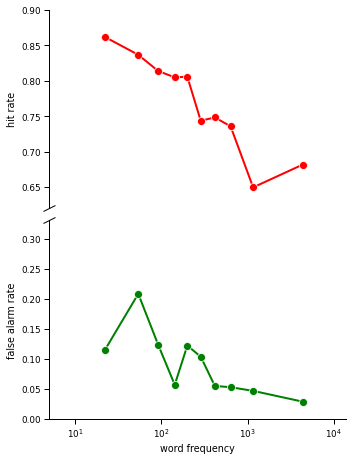

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize=(5,6.5))
fig.subplots_adjust(hspace=0.03)

sns.lineplot(data=df_quantgp, y='hr', x='freq_mean', ax=ax1, marker = 'o', color = 'r', markersize = 8, linewidth = 2)
sns.lineplot(data=df_quantgp, y='far', x='freq_mean', ax=ax2, marker = 'o', color = 'g', markersize = 8, linewidth = 2)

ax1.set_ylim(0.62, 0.9)
ax1.set_yticks(np.arange(0.65,0.91,0.05))
ax2.set_ylim(0.05, 0.33)
ax2.set_yticks(np.arange(0,0.35,0.05))
plt.xscale('log')
plt.xlim(5, 14000)

ax1.spines.bottom.set_visible(False)
ax1.spines.top.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.spines.right.set_visible(False)
ax2.spines.right.set_visible(False)
ax1.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False, 
    labelbottom=False,
    labeltop=False) 
ax2.minorticks_off()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot(0,0, transform=ax1.transAxes, **kwargs)
ax2.plot(0,1, transform=ax2.transAxes, **kwargs)

ax1.set_ylabel('hit rate')
ax1.set_xlabel(None)
ax2.set_ylabel('false alarm rate')
ax2.set_xlabel('word frequency')

plt.tight_layout(h_pad = 0)
plt.savefig('fig/simu4_WFE.pdf')
plt.show()

### Analysis

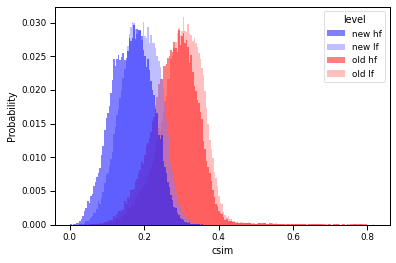

In [20]:
sns.histplot(data=df_simu, x="csim", hue = "level", hue_order = ["new hf", "new lf", "old hf", "old lf"], palette = [[0,0,1],[0.5,0.5,1],[1,0,0],[1,0.5,0.5]], stat = "probability", common_norm=False, edgecolor = None)
plt.savefig('fig/simu4_csim.pdf')